# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 25 de Abril de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>Pablo Martín Palomino</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Agrupamiento (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

In [1]:
# Carga del conjunto de datos
import pandas as pd

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(5)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

#Clustering problem
In this exercise, students will tackle a clustering problem, which they will need to address from start to finish (from exploratory analysis to training and validation of the selected machine learning models). In particular, they will face a real-world problem involving the use of machine learning techniques to abstract a dataset in such a way that it can be grouped into categories or clusters. The original dataset is obtained from the research conducted in the following article:

https://www.google.com/url?q=https%3A%2F%2Fwww.jstor.org%2Fstable%2F2347385%3Forigin%3Dcrossref%26seq%3D1

The objective of the practice is to develop a machine learning model capable of identifying, if possible, how many categories of eruptions exist, based on the data provided by the measurements. The decision model(s) for determining the number of categories must be/should be an unsupervised learning method(s) for clustering construction.

The dataset https://www.google.com/url?q=https%3A%2F%2Fwww.stat.cmu.edu%2F%7Elarry%2Fall-of-statistics%2F%3Ddata%2Ffaithful.dat

## Solution



###Clustering problem resolution

The problem involves developing a machine learning model capable of identifying, if possible, how many categories of eruptions exist. For this purpose, we will use the k-means and DBSCAN models.

First, we will import all the necessary libraries and load the data we will be using.

In [2]:
# Loading the dataset and necessary imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    homogeneity_score, completeness_score, v_measure_score,
    adjusted_rand_score, silhouette_score , davies_bouldin_score
)
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from time import time
from sklearn.preprocessing import StandardScaler
import random
from IPython.display import Image

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(5)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


Now we are going to see if we can make some conclusions based on the properties of our dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


Here we can see that:

----

**Dataset Size**

**272 samples**:   Moderate-sized dataset, suitable for clustering without heavy computational demands.

Features

    eruptions (float64): Measures eruption duration.

    waiting (int64): Represents time between eruptions.

    Unnamed: 0 (int64): An index column.

**No Missing Values**

All columns have 272 non-null entries, so no imputation is needed.

**Data Types**

Numeric data only

Now we will take a look to the "numeric information" that the dataset gives us.

In [4]:
df.describe()

,Unnamed: 0,eruptions,waiting
count,272.000000,272.000000,272.000000
mean,29.746324,3.487783,70.897059
std,23.449679,1.141371,13.594974
min,1.000000,1.600000,43.000000
25%,15.000000,2.162750,58.000000
50%,21.000000,4.000000,76.000000
75%,31.250000,4.454250,82.000000
max,99.000000,5.100000,96.000000


Taking a look we can see that the mean is waiting 70 minutes to see a eruption of 3 minutes but this does not really help us in the process of categorizing the eruptions based on the their frequence in time and duration. Let's plot the data to see if we can gain more insights

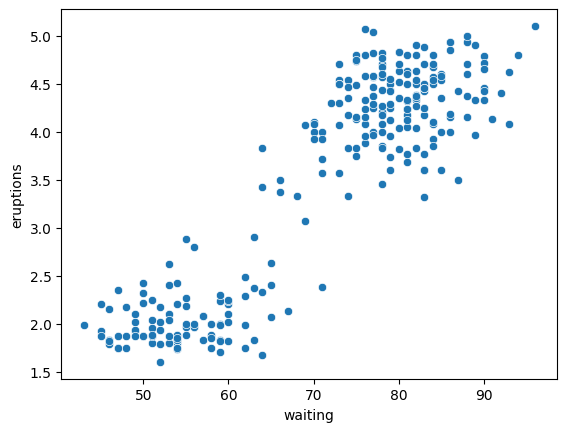

In [5]:
sns.scatterplot(data=df, x='waiting', y='eruptions')
plt.show()

We can clearly see a distinction between two cluster , i mean , we can clearly separate the data in two clusters so we got a pretty good intuition in how many groups we should take to solve the clustering problem we are working on

I am going to make a function which makes all the process to train, measure the time of training and get all the scores for the model Kmeans. First i am going to introduce the function and then i will explain all the things it does.

In [6]:
def evaluate_Kmeans(model, X, plot_clusters=True):
    """
    Evaluate a clustering model with advanced metrics.

    Parameters:
      model: Kmeans clustering model.
      X: Input data (array or DataFrame).
      plot_clusters: If True, plots the clusters.
    """
    # Training and time
    start_time = time()
    model.fit(X)
    labels = model.labels_
    training_time = time() - start_time

    # Unsupervised metrics
    wcss = model.inertia_ if hasattr(model, 'inertia_') else None
    s_score = silhouette_score(X, labels)
    d_score = davies_bouldin_score(X, labels)

    # Base Results
    print("\n=== Clustering Metrics ===")
    print(f"- WCSS (Within Cluster Sum of Squares): {wcss:.4f}" if wcss is not None else "- WCSS: Not available")
    print(f"- S-Score (Silhouette Score): {s_score:.4f}")
    print(f"- D-Score (Davies_Bouldin_Score): {d_score:.4f}")

    print(f"\n- Training time: {training_time:.4f} seconds")


    # Plotting clusters
    if plot_clusters:
        if X.shape[1] == 2:
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
            if hasattr(model, 'cluster_centers_'):
                plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
                            marker='X', s=200, c='red', label='Centroids')
            plt.title(f'Clusters (k={len(np.unique(labels))})')
            plt.legend()
            plt.show()


Okey, this function take a kmeans model, what is a Kmeans model? :


## K-Means Clustering Model

### **Definition**
K-Means is an **unsupervised machine learning algorithm** that partitions data into `k` distinct clusters based on similarity. Each cluster is represented by its **centroid** (mean of points in the cluster).

### **How It Works**
1. **Initialization**:  
   - Randomly select `k` centroids (where `k` = number of clusters).  
2. **Assignment**:  
   - Assign each data point to the nearest centroid (using distance metrics like Euclidean distance).  
3. **Update**:  
   - Recalculate centroids as the mean of all points in the cluster.  
4. **Repeat**:  
   - Iterate until centroids stabilize (or max iterations reached).  

### **Key Features**
- **Input**: Unlabeled data (`n_samples × n_features`).  
- **Output**: Cluster labels (`0` to `k-1`) and centroid positions.  
- **Distance Metric**: Typically **Euclidean distance** (L2).  

### **Mathematical Formulation**
Minimize the **within-cluster sum of squares (WCSS)**:  
$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$  

(This formula is explained in metrics just below)

### **Advantages**
- Simple and fast for large datasets.

- Guaranteed convergence.  

- Works well with spherical clusters.  

### **Limitations**
- Requires pre-specifying `k` (number of clusters).  

- Sensitive to initial centroids.

- Struggles with non-spherical or unevenly sized clusters.  

In [7]:
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.ejable.com%2Fwp-content%2Fuploads%2F2023%2F11%2FUnlabeled-data-vs.-labeled-clusters-3.webp&f=1&nofb=1&ipt=f823d3a07a7be1c3aa8ecc2297e85c2fb493088e6f0d63daca64aa586480cbcd'

Image(url=image_url)

then the function evaluates the model output using the following metrics:

## 1. WCSS (Within-Cluster Sum of Squares)

**Definition:**

WCSS measures the total squared distance between each point and the centroid of its assigned cluster. It evaluates **intra-cluster compactness** — how closely related points in the same cluster are.

**Formula:**

$$
WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

Where:
$$
- k : \text{number of clusters}
$$
$$
- C_i: \text{set of points in cluster i}  
$$
$$
- \mu_i : \text{centroid of cluster i}
$$
$$
- x : \text{data point}
$$


**Usage:**
- Commonly used in the **Elbow Method** to determine the optimal number of clusters (used just below).
- A lower WCSS indicates more compact clusters, but WCSS naturally decreases as \( k \) increases.

---

## 2. Silhouette Score (S-Score)

**Definition:**

The Silhouette Score combines ideas of **cohesion** (how close a point is to other points in the same cluster) and **separation** (how far a point is from points in the nearest cluster it’s not a part of).

**Formula:**

For each point \( i \):

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:

- a(i) : average distance from point i to all other points in the same cluster


- b(i) : lowest average distance of point i to points in any other cluster


**Score Range:**
- **+1**: point is well-matched to its cluster and well-separated from others  
- **0**: point is on or very close to the decision boundary between two clusters  
- **-1**: point may have been assigned to the wrong cluster

**Usage:**
- Good for evaluating **both the cohesion and separation** of clusters.
- Works without knowing ground truth labels, making it perfect for unsupervised learning.

---

## 3. Davies-Bouldin Score (D-Score)

**Definition:**

The Davies-Bouldin Index measures the **average similarity** between each cluster and its most similar cluster. Similarity is calculated as the ratio of within-cluster scatter to between-cluster separation.

**Formula:**

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)
$$

Where:
$$
- \sigma_i : \text{average distance of all points in cluster \( i \) to the centroid of i (i.e., cluster scatter)}  
$$
$$
- d_{ij}: \text{distance between centroids of clusters i and j }
$$
$$
- k: \text{number of clusters}
$$

**Interpretation:**
- Lower **DB scores** are better: they indicate well-separated, compact clusters.
- Sensitive to overlapping clusters and noise.

**Usage:**
- Helps in comparing multiple clustering models or configurations.
- Unlike WCSS, this metric is **normalized**, making it easier to compare across models.

---

## Summary Table

| Metric         | Evaluates            | Range      | Best Value | Needs Labels? |
|----------------|----------------------|------------|------------|----------------|
| WCSS           | Compactness (intra)  | [0, ∞)     | Lower      | No             |
| Silhouette     | Cohesion + Separation| [-1, 1]    | Closer to 1| No             |
| Davies-Bouldin | Compactness & Sep.   | [0, ∞)     | Lower      | No             

In [8]:
X=df[['eruptions', 'waiting']].values

Now we are going to confirm whether our initial assumption was correct,that the number of clusters should be two. To do this, we will use the Elbow Method.
What is the Elbow Method?

The **Elbow Method** is a heuristic used in **K-Means clustering** to determine the optimal number of clusters (**k**) in a dataset. It helps answer the question:

-"How many clusters should I use?"

The method evaluates how the **Within-Cluster Sum of Squares (WCSS)** changes as the number of clusters increases.

---

## How Does It Work?

1. **Run K-Means** clustering on the dataset for a range of values of  k .
2. **Calculate WCSS** for each value of k . WCSS is the sum of the squared distances between each point and the centroid of its assigned cluster.
3. **Plot the values of WCSS against the number of clusters**.
4. **Look for the "elbow" point** in the plot — the point where the rate of decrease in WCSS slows down sharply.

---

## Why Does It Work?

- As k increases, WCSS decreases because clusters are smaller and tighter.
- However, after a certain point, adding more clusters doesn't significantly improve the model.
- The "elbow" point represents a good trade-off between **compactness** and **simplicity**.

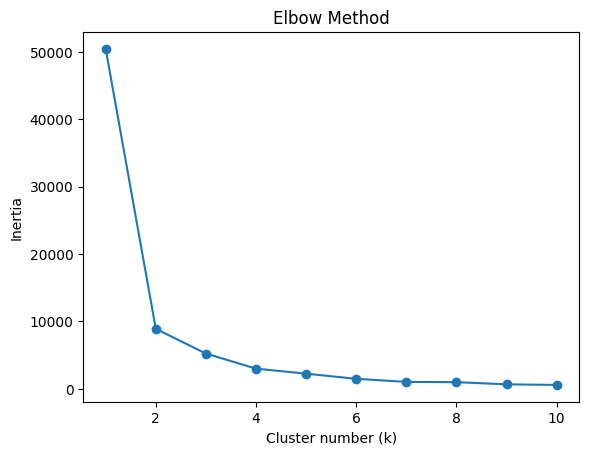

In [9]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Cluster number (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Here we can see that our assumptions were right, the elbow is in k = 2.

Now lets see how it does with this k.


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 8901.7687
- S-Score (Silhouette Score): 0.7241
- D-Score (Davies_Bouldin_Score): 0.3689

- Training time: 0.0056 seconds


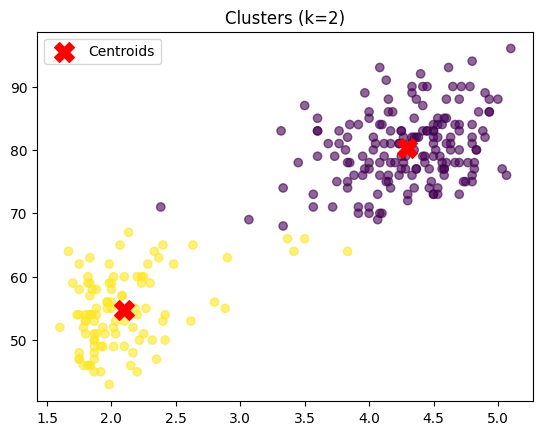

In [10]:
knnmean=KMeans(n_clusters=2)
evaluate_Kmeans(knnmean,X)

We can observe that it has a pretty solid S-score being over 0,7 which is pretty good for our problem. We can also see that the D-score is under 0,4 which is not the ideal but its enough for our problem.

Now we are going to see if scaling the data helps improve the results


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 79.5760
- S-Score (Silhouette Score): 0.7452
- D-Score (Davies_Bouldin_Score): 0.3406

- Training time: 0.0038 seconds


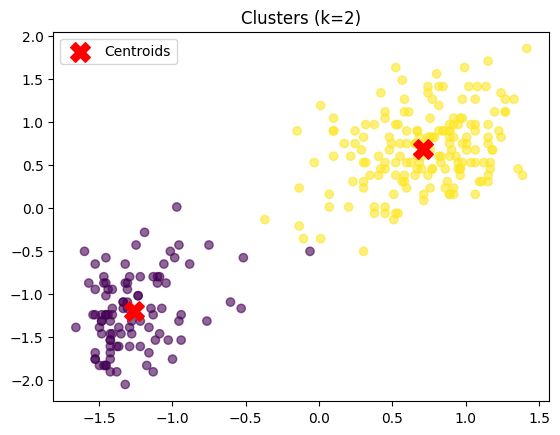

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knnmean=KMeans(n_clusters=2)
evaluate_Kmeans(knnmean,X_scaled)

We see a slight improvement, if we wanted to see the classification of each individual data we can see it by doing the next line, which gives us the label of each point, which could be used for instance as a guide to used supervised models.

In [12]:
knnmean.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

Now lets see if we can get better results by taking k=3 which is the nearest k to two making sense to use.


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 5188.5405
- S-Score (Silhouette Score): 0.5804
- D-Score (Davies_Bouldin_Score): 0.5405

- Training time: 0.0136 seconds


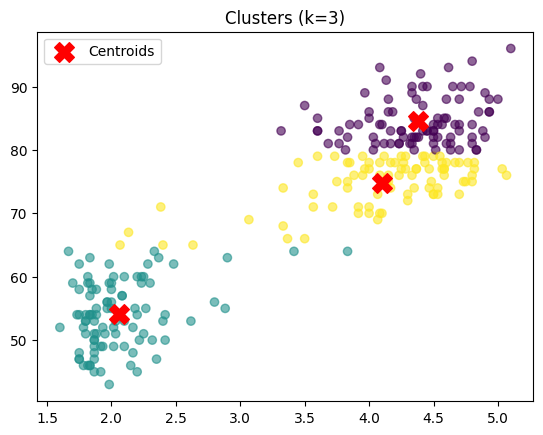

In [13]:
knnmean=KMeans(n_clusters=3)
evaluate_Kmeans(knnmean,X)

We can see an improvement in WCSS but also we see that the other two metrics get way worse value, so taking that into account we ought to say that k = 2 its the best option here.

Now to confirm this we are going to take a look again but now with the data scaled


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 56.3481
- S-Score (Silhouette Score): 0.4892
- D-Score (Davies_Bouldin_Score): 0.8115

- Training time: 0.0112 seconds


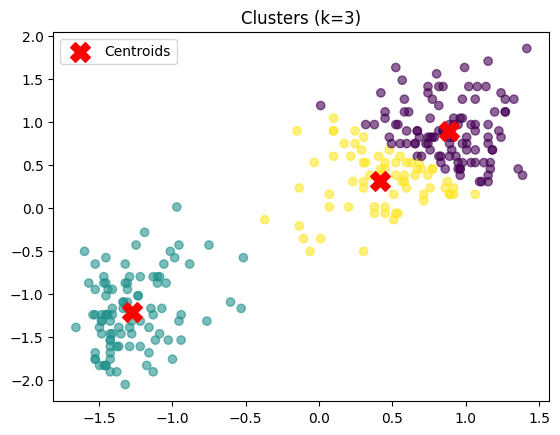

In [14]:
knnmean=KMeans(n_clusters=3)
evaluate_Kmeans(knnmean,X_scaled)

We see a very bad Davues_Bouldin_Score and a way worse S-core than whith k = 2 so, no need for more discussion the best option is k=2.

Now that we've determined the optimal number of clusters k is 2, we'll proceed to find the best hyperparameters for this model using the silhouette_score as our evaluation metric, since it effectively considers both cluster cohesion and separation. We will use the data scaled since it gives better results.

In [15]:
random.seed(42)
# Randomized hyperparameter search for KMeans
param_grid = {
    # Number of clusters (k): how many groups to form
    "n_clusters": list(range(2, 5)),

    # Initialization method for centroids:
    # "k-means++" spreads out the initial centroids
    # "random" chooses initial centroids randomly
    "init": ["k-means++", "random"],

    # Number of times the algorithm will be run with different centroid seeds
    "n_init": [5, 10, 15],

    # Maximum number of iterations for a single run
    "max_iter": [100, 200, 300]
}

# Sample 40 random combinations
n_samples = 40
results = []

for _ in range(n_samples):
    params = {
        "n_clusters": random.choice(param_grid["n_clusters"]),
        "init": random.choice(param_grid["init"]),
        "n_init": random.choice(param_grid["n_init"]),
        "max_iter": random.choice(param_grid["max_iter"])
    }

    model = KMeans(**params, random_state=42)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)

    results.append((params, score))

# Find best result
best_kmeans = max(results, key=lambda x: x[1])
print("Best KMeans params:", best_kmeans[0])
print("Silhouette Score:", best_kmeans[1])

Best KMeans params: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 5, 'max_iter': 100}
Silhouette Score: 0.7451774401188772


How does k-means ++ work? (It is the **default init method in scikit-learn's `KMeans`**)

Given a desired number of clusters k , the algorithm proceeds as follows:

1. **Choose the first centroid** randomly from the data points.
2. For each point x , compute the **squared distance** D(x)^2  to the **nearest** already selected centroid.
3. Choose the next centroid from the remaining points with **probability proportional to D(x)^2**.  
       This gives higher probability to points that are far from current centroids.
4. Repeat steps 2-3 until k centroids are chosen.
5. Proceed with regular KMeans using these initial centroids.

---

**Benefits**

- Reduces the chances of **bad initializations**
- Leads to **better final clustering** (lower WCSS, better Silhouette Score)
- Usually results in **faster convergence**

Now that we have the best hyperparameters for this model and this data lets train it and then after doing the same process with DBSCAN we will make conclusions


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 79.5760
- S-Score (Silhouette Score): 0.7452
- D-Score (Davies_Bouldin_Score): 0.3406

- Training time: 0.0223 seconds


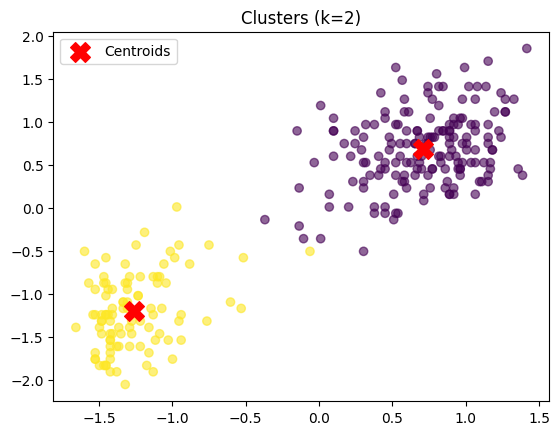

In [16]:
knnmean=KMeans(n_clusters=2,init='k-means++',n_init= 5,max_iter= 100)
evaluate_Kmeans(knnmean,X_scaled)

Now we are going to do the same process with DBSCAN, I am also going to use a function which makes all the process

## DBSCAN Clustering Model

### **Definition**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an **unsupervised machine learning algorithm** that groups together points that are closely packed (dense regions), marking outliers in low-density areas.

### **How It Works**
1. **Core Points**:  
   - A point is a *core point* if at least `min_samples` points are within distance `eps`.  
2. **Border Points**:  
   - Points reachable from a core point but with fewer than `min_samples` neighbors.  
3. **Noise Points**:  
   - Points not reachable from any core point.  

### **Key Features**
- **Input**: Unlabeled data (`n_samples × n_features`).  
- **Output**: Cluster labels (`-1` for noise, `0` to `n_clusters-1` otherwise).  
- **Distance Metric**: Typically **Euclidean distance** .  

### **Mathematical Formulation**
Cluster definition based on density-reachability:
$$
\text{Cluster} = \{x | x \text{ is density-reachable from a core point}\}
$$
Where density-reachability requires:
1. Direct density-reachable:  
   $x_j$ is in the `eps`-neighborhood of $x_i$ (core point).  
2. Density-connected:  
   $x_i$ and $x_j$ share a common core point.  

### **Advantages**
- **No need to specify number of clusters** (discovers them automatically).  
- **Handles arbitrary cluster shapes** (non-spherical).  
- **Robust to outliers** (explicit noise label `-1`).  

### **Limitations**
- **Sensitive to `eps` and `min_samples`** (critical parameter tuning).  
- **Struggles with varying densities** (global `eps` may not fit all clusters).  
- **Higher computational cost** vs. K-Means for large datasets.

In [17]:
image_url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fv2%2Fresize%3Afit%3A1358%2F1*GZQsTGh1s3fAIQUx9QQntw.png&f=1&nofb=1&ipt=48d4e93f4d608e783dffbf322fdd32c26cf8f1a8ddbf992b88a5ac59f38c8eed'

Image(url=image_url)

In [18]:
def evaluate_dbscan(model,X):
    labels = model.fit_predict(X)

    # Metrics (if 2 clusters and not only noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 0:
        silhouette = silhouette_score(X, labels) if n_clusters > 1 else None
        david = davies_bouldin_score(X, labels) if n_clusters > 1 else None
    else:
        silhouette = None
        david = None

    # Results
    print(f"\nDBSCAN Results (eps={model.eps}, min_samples={model.min_samples}):")
    print(f"- Cluster Number: {n_clusters}")
    print(f"- Points considered noise (-1): {np.sum(labels == -1)}")
    if silhouette is not None and davies_bouldin_score is not None:
        print(f"- Silhouette Score: {silhouette:.4f}")
        print(f"- Davies-Bouldin Score: {david:.4f}")
    else:
        print("- Not enough clusters to calculate internal metrics.")

    # Plotting
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.title(f'DBSCAN (eps={model.eps}, min_samples={model.min_samples})')
    plt.xlabel('Eruptions ')
    plt.ylabel('Waiting Time ')
    plt.colorbar(label='Cluster')
    plt.show()

The metrics are the same that with kmeans but we are not using wcss since dbscan doesn't use centroids.

We are going to "play" with the hyperparameters manually , see some conclusions and then going to usa a random search of hyperparameters to get the best solution possible with this model and data. I am going to explain it hyperparameters:

    
    "eps": Maximum distance between two samples to be considered neighbors
    
   
    "min_samples": Minimum number of samples in a neighborhood to form a core point
    
    
    "metric": Distance metric to use


DBSCAN Results (eps=2, min_samples=5):
- Cluster Number: 3
- Points considered noise (-1): 5
- Silhouette Score: 0.4932
- Davies-Bouldin Score: 3.0745


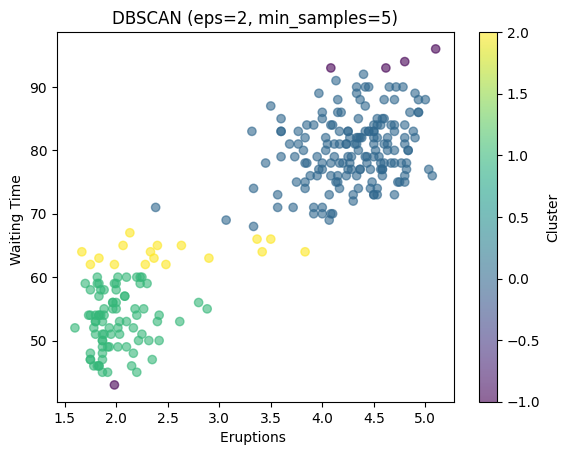

In [19]:
X=df[['eruptions', 'waiting']].values
dbscan=DBSCAN(eps=2, min_samples=5)
evaluate_dbscan(dbscan,X)

Let's try now with the data scaled, having in mind that purple represents 'noise'


DBSCAN Results (eps=0.3, min_samples=5):
- Cluster Number: 2
- Points considered noise (-1): 8
- Silhouette Score: 0.5653
- Davies-Bouldin Score: 0.9766


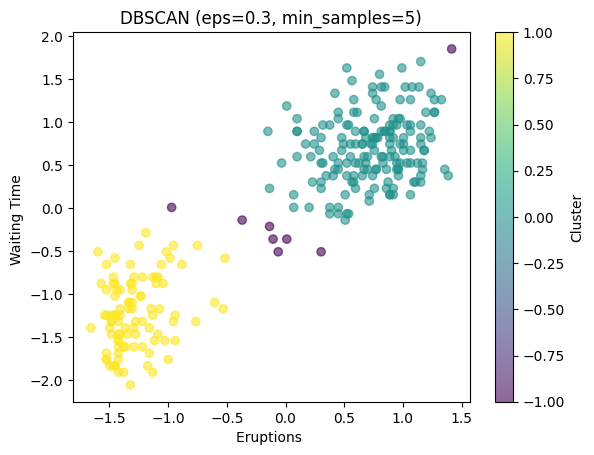

In [20]:
dbscan=DBSCAN(eps=0.3, min_samples=5)
evaluate_dbscan(dbscan,X_scaled)


DBSCAN Results (eps=0.1, min_samples=10):
- Cluster Number: 3
- Points considered noise (-1): 238
- Silhouette Score: -0.5025
- Davies-Bouldin Score: 1.0762


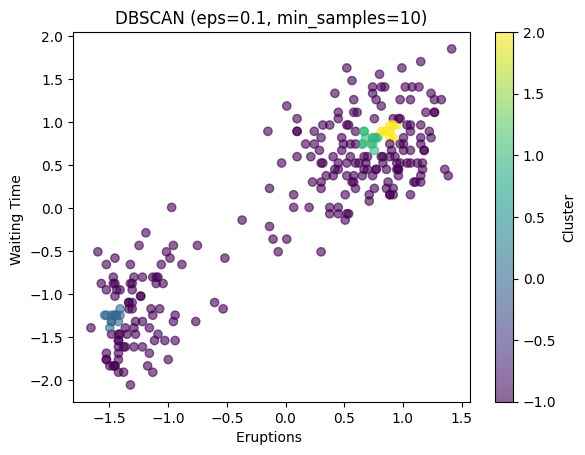

In [21]:
dbscan=DBSCAN(eps=0.1, min_samples=10)
evaluate_dbscan(dbscan,X_scaled)

We get with this hyperparameter values awful results ( a lot of 'noise')

Let's search for the best hyperparameters values and use them.

In [22]:
random.seed(102)
# Randomized hyperparameter search for DBSCAN
param_grid = {
    # Maximum distance between two samples to be considered neighbors
    "eps": np.linspace(0.1, 2.0, 20),  # 20 values between 0.1 and 2.0

    # Minimum number of samples in a neighborhood to form a core point
    "min_samples": list(range(2, 10)),  # Values from 2 to 9

    # Distance metric to use
    "metric": ["euclidean", "manhattan", "cosine"]
}

# Sample 40 random combinations
n_samples = 40
results = []

for _ in range(n_samples):
    params = {
        "eps": random.choice(param_grid["eps"]),
        "min_samples": random.choice(param_grid["min_samples"]),
        "metric": random.choice(param_grid["metric"])
    }

    model = DBSCAN(**params)
    labels = model.fit_predict(X_scaled)

    # Only calculate score if we found at least 2 clusters (excluding noise)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels)
    else:
        score = -1  # Penalize cases with too few clusters

    results.append((params, score, n_clusters))

# Find best result (filter out cases with score -1)
valid_results = [r for r in results if r[1] != -1]
best_dbscan = max(valid_results, key=lambda x: x[1])

print("\nBest DBSCAN params:", best_dbscan[0])
print("Silhouette Score:", best_dbscan[1])
print("Number of clusters found:", best_dbscan[2])


Best DBSCAN params: {'eps': np.float64(0.5), 'min_samples': 4, 'metric': 'manhattan'}
Silhouette Score: 0.7460024896679954
Number of clusters found: 2



DBSCAN Results (eps=0.5, min_samples=4):
- Cluster Number: 2
- Points considered noise (-1): 0
- Silhouette Score: 0.7460
- Davies-Bouldin Score: 0.3377


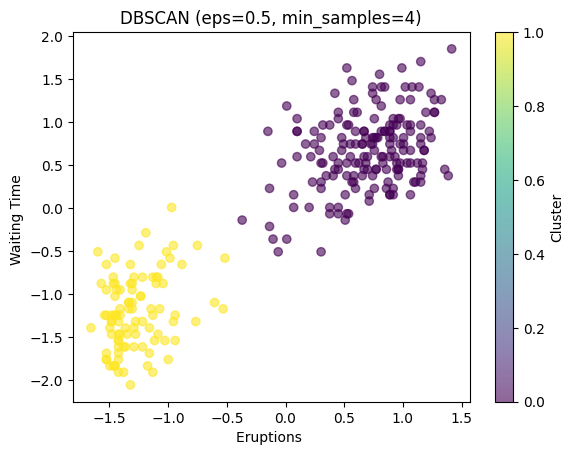

In [23]:
dbscan=DBSCAN(eps=0.5, min_samples=4,metric='manhattan')
evaluate_dbscan(dbscan,X_scaled)

##Conclusions


=== Clustering Metrics ===
- WCSS (Within Cluster Sum of Squares): 79.5760
- S-Score (Silhouette Score): 0.7452
- D-Score (Davies_Bouldin_Score): 0.3406

- Training time: 0.0239 seconds


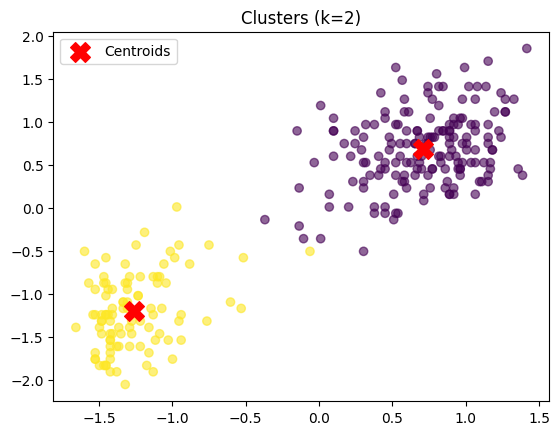


DBSCAN Results (eps=0.5, min_samples=4):
- Cluster Number: 2
- Points considered noise (-1): 0
- Silhouette Score: 0.7460
- Davies-Bouldin Score: 0.3377


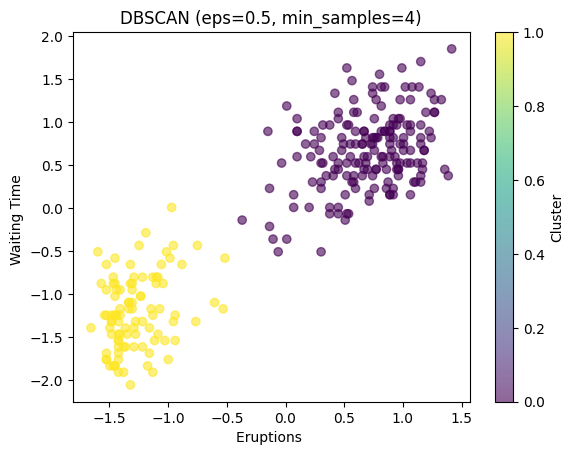

In [24]:
knnmean=KMeans(n_clusters=2,init='k-means++',n_init= 5,max_iter= 100)
evaluate_Kmeans(knnmean,X_scaled)
dbscan=DBSCAN(eps=0.5, min_samples=4,metric='manhattan')
evaluate_dbscan(dbscan,X_scaled)

**Observations on Models Performance**

Both models demonstrate good clustering capability for this problem, but there is a big difference between both:

### HyperParameter Sensitivity
- **K-Means**  
  - Single intuitive parameter (`n_clusters`)  
  - Results stable across random initializations  

- **DBSCAN**  
     Requires tuning two interdependent parameters:  
  - `eps`: Critical radius for neighborhood  
  - `min_samples`: Density threshold  
  - Small `eps` changes can completely alter clustering

Having that in mind, both models are able to perform good for this clustering problem so lets take a look on when does one of this model work better than the other.

-----

### **When to use K-Means**

- **Cluster shape is spherical**

- **All points belong to clusters**

- **You know/prefer to specify `k`**

- **Computational efficiency is key**

### **When to use DBSCAN**

- **Clusters have irregular shapes**  

- **Noise detection is required**

- **Cluster count is unknown**

- **Density varies significantly**

Since the data showed even density between groups (we see in the plot of data 2 groups pretty easily k=2) and the clusters shape look kinda spherical we can infer that kmeans should be better.

# **Ejercicio 2: Minería de reglas de asociación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

In [25]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**

Un ejemplo de uso de ```%timeit``` se encuentra en la siguiente celda de código:



In [26]:
import numpy as np

%timeit np.zeros(1000)

1.33 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Solution
In this exercise, students will tackle an association rule mining problem, which they will address from start to finish (from exploratory analysis to training and validating the selected machine learning models). In particular, they will face a real-world problem involving the use of machine learning techniques to abstract a dataset in order to extract association rules of the form X→Y from frequent itemsets.

First we install mlxtend library which is a Python package that provides various helper functions for machine learning and data analysis. One of its key features is support for association rule mining, particularly through implementations of the Apriori algorithm and FP-Growth for frequent itemset generation, followed by rule extraction that we are going to use in this problem

In [27]:
pip install mlxtend

Let's take a look to the dataset

In [28]:
import pandas as pd
import numpy as np

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


**Dataset Overview**

21,293 samples: A large transaction dataset, ideal for association rule mining.

---

**Features**

- Date (object): Transaction date.

- Time (object): Transaction timestamp.

- Transaction (int64): Unique transaction ID (used to group items into baskets).

- Item (object): Product name (categorical data; one-hot encoding required for analysis).


- No missing values: All columns have 21,293 non-null entries.

Now we are going to see how many different items we have

In [30]:
unique_items = df['Item'].unique()
print(unique_items.size)
print(sorted(unique_items))

unique_items = df['Item'].str.lower().unique()
print(unique_items.size)
print(sorted(unique_items))

95
['Adjustment', 'Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread', 'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common', 'Coffee', 'Coffee granules ', 'Coke', 'Cookies', 'Crepes', 'Crisps', 'Drinking chocolate spoons ', 'Duck egg', 'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches", 'Empanadas', 'Extra Salami or Feta', 'Fairy Doors', 'Farm House', 'Focaccia', 'Frittata', 'Fudge', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Half slice Monster ', 'Hearty & Seasonal', 'Honey', 'Hot chocolate', 'Jam', 'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit', 'Lemon and coconut', 'Medialuna', 'Mighty Protein', 'Mineral water', 'Mortimer', 'Muesli', 'Muffin', 'My-5 Fruit Shoot', 'NONE', 'Nomad bag', 'Olum & polenta', 'Panatone', 

We can see that we don't have inconsistencies in naming with lower and upper letters.

Now I am going to plot the number of times each item appears in the dataset to gain insights into what we can expect to see later in the analysis

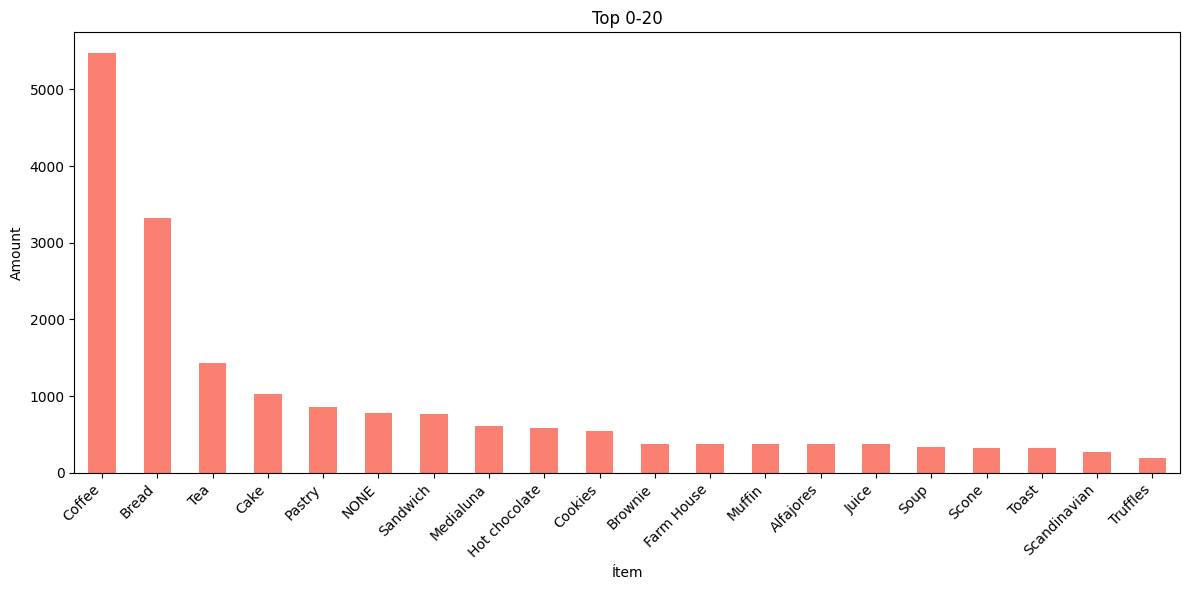

In [31]:
item_counts = df['Item'].value_counts()
top_items = item_counts.head(20)

# Create bar plot
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='salmon')

# Personal adjustments
plt.title('Top 0-20')
plt.xlabel('Ítem')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

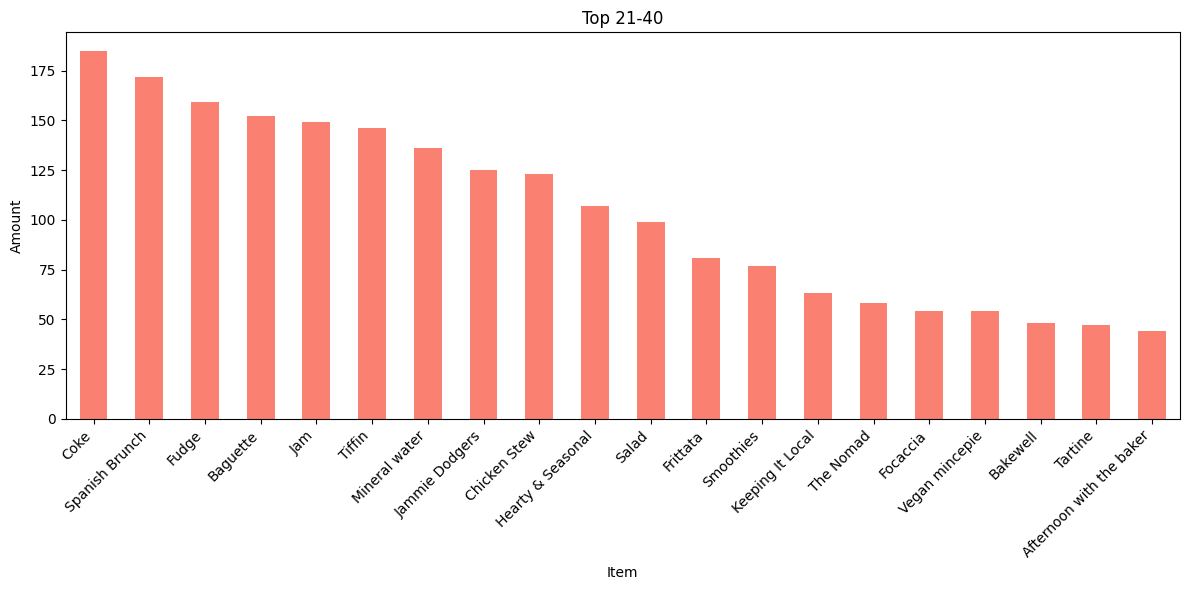

In [32]:
# Plotting items 21-40
siguientes_20 = item_counts.iloc[20:40]
plt.figure(figsize=(12, 6))
siguientes_20.plot(kind='bar', color='salmon')

plt.title('Top 21-40')
plt.xlabel('Item')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

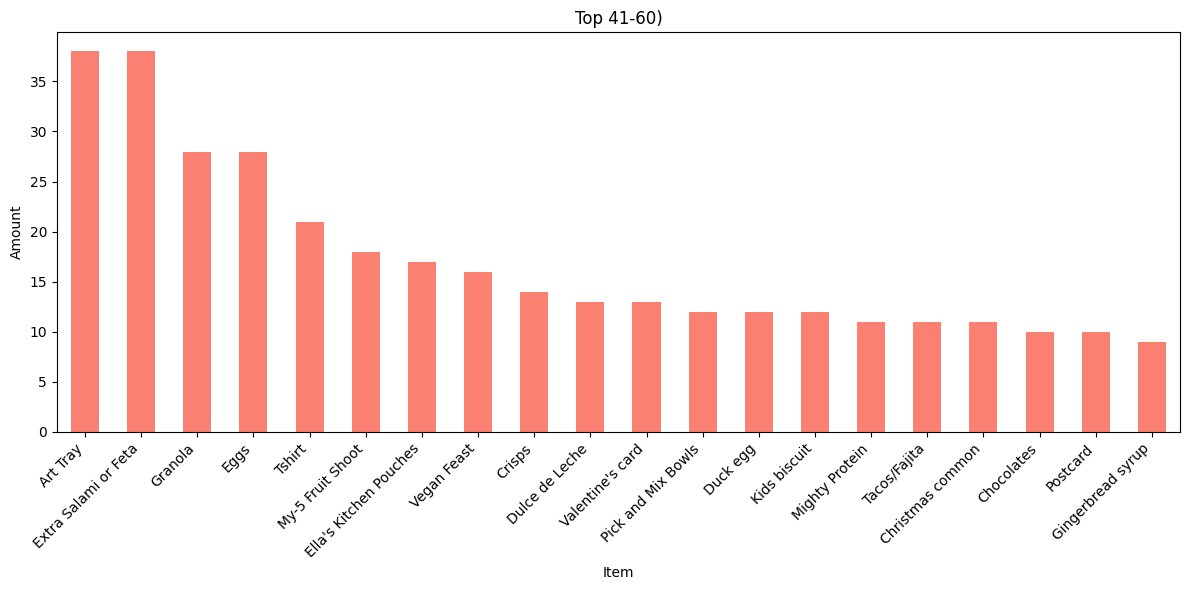

In [33]:
siguientes_20 = item_counts.iloc[40:60]
plt.figure(figsize=(12, 6))
siguientes_20.plot(kind='bar', color='salmon')

plt.title('Top 41-60)')
plt.xlabel('Item')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

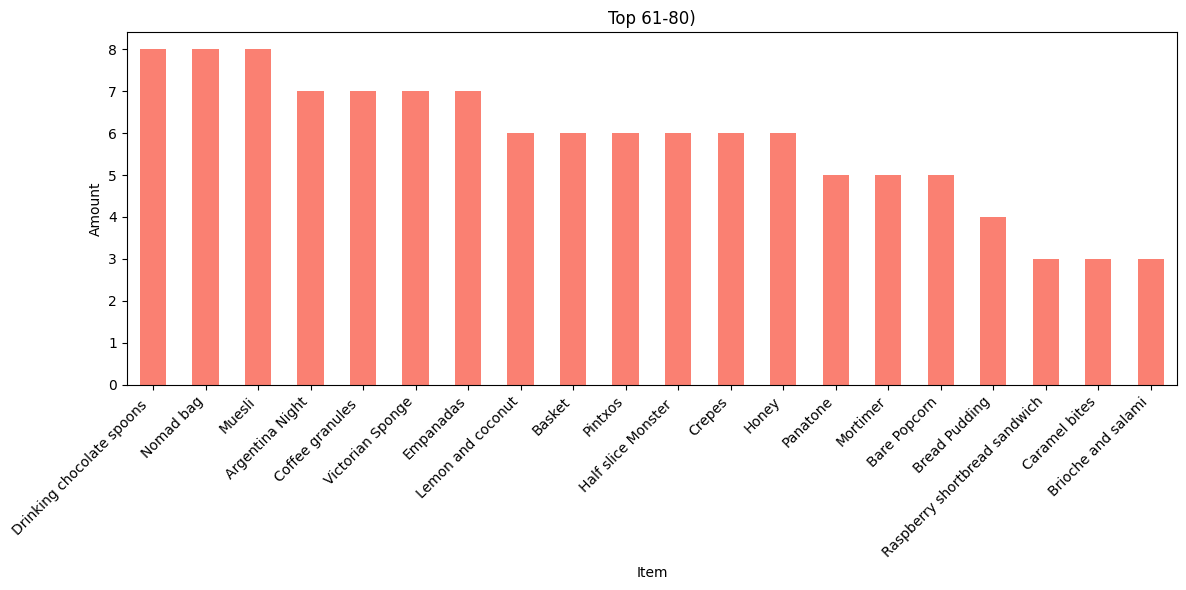

In [34]:
siguientes_20 = item_counts.iloc[60:80]
plt.figure(figsize=(12, 6))
siguientes_20.plot(kind='bar', color='salmon')

plt.title('Top 61-80)')
plt.xlabel('Item')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

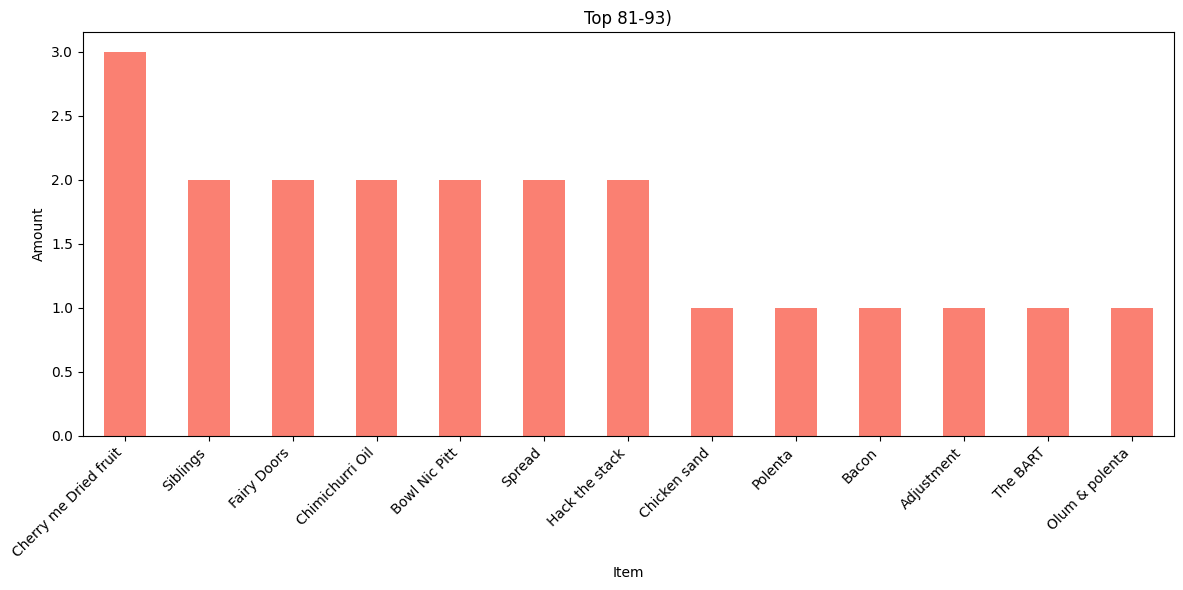

In [35]:
siguientes_20 = item_counts.iloc[80:93]
plt.figure(figsize=(12, 6))
siguientes_20.plot(kind='bar', color='salmon')

plt.title('Top 81-93)')
plt.xlabel('Item')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

We can see that they sell vast amounts of coffee, so we should expect some rules involving it.

In [36]:
# Remove irrelevant products
invalid_filters = ['Adjustement', 'NONE', 'Afternoon with the baker']
df = df[~df['Item'].isin(invalid_filters)]

# Group products by transaction (ID)
# This creates a list of products per ticket
basket = df.groupby('Transaction')['Item'].apply(list)
basket

,Item
Transaction,
1,[Bread]
2,"[Scandinavian, Scandinavian]"
3,"[Hot chocolate, Jam, Cookies]"
4,[Muffin]
5,"[Coffee, Pastry, Bread]"
...,...
9680,[Bread]
9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"


Now we are going to one-hot enconde the data for that we are using TransactionEncoder.

The TransactionEncoder from the mlxtend library is a preprocessing tool that converts transaction data (lists of items) into a binary matrix format (one-hot encoding) suitable for association rule mining algorithms like Apriori or FP-Growth.

Transforms transactional data into a binary DataFrame where:

    -Rows = Transactions

    -Columns = Unique items

    -Values = True/False (or 1/0) indicating item presence in a transaction.

**Methods**:

- **fit(transactions)**: Learns the unique items in the dataset.

- **transform(transactions)**: Converts each transaction into a binary array based on the learned items.

In [37]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)
df_basket

,Adjustment,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now for the frequent pattern extraction we are going to use two models: apriori and fpgrowth:


## Apriori Algorithm

### **Definition**
Apriori is an **unsupervised machine learning algorithm** used for **association rule learning**. It identifies frequent itemsets in transactional data and derives rules to describe how items are associated with each other.

### **How It Works**
1. **Frequent Itemsets Generation**:  
   - Iteratively finds itemsets that occur together more than a minimum support threshold.
2. **Candidate Pruning**:  
   - Uses the **Apriori property**: if an itemset is frequent, all its subsets must also be frequent.
3. **Association Rules Extraction**:  
   - Generates rules from frequent itemsets that meet a minimum confidence threshold.

### **Key Features**
- **Input**: Transaction dataset (`n_transactions x n_items`).  
- **Output**: Association rules.  
- **Metrics**:  
  - **Support**: Frequency of itemset in the dataset.  
  - **Confidence**: Likelihood of `B` given `A`.  
  - **Lift**: Strength of the rule over random co-occurrence.

### **Mathematical Formulation**
Given itemsets \( A \) and \( B \):

- **Support**:  
  $$
  \text{support}(A \cup B) = \frac{\text{transactions containing } A \cup B}{\text{total transactions}}
  $$

- **Confidence**:  
  $$
  \text{confidence}(A \rightarrow B) = \frac{\text{support}(A \cup B)}{\text{support}(A)}
  $$

- **Lift**:  
  $$
  \text{lift}(A \rightarrow B) = \frac{\text{confidence}(A \rightarrow B)}{\text{support}(B)}
  $$

### **Advantages**
- **Interpretable results**.  
- **Effective on market basket data**.  
- **Easy to implement** and understand.

### **Limitations**
- **Computationally expensive** for large datasets (combinatorial explosion).  
- **Requires discrete data** (continuous data must be preprocessed).  
- **Needs careful selection of support/confidence thresholds** (too high → no rules, too low → too many).

## FP-Growth Algorithm

### **Definition**
FP-Growth (Frequent Pattern Growth) is an **unsupervised machine learning algorithm** for **association rule mining**. Unlike Apriori, it does not generate candidate itemsets explicitly but instead uses a **compact tree structure** (FP-Tree) to extract frequent patterns efficiently.

## FP-Tree (Frequent Pattern Tree)

### **Definition**
An **FP-Tree (Frequent Pattern Tree)** is a **compact tree structure** used in the FP-Growth algorithm to represent transaction data. It stores itemsets in a way that preserves the item frequency and itemset ordering, allowing efficient mining of frequent patterns without generating candidate itemsets.

### **How It Works**
1. **Scan the dataset** to identify frequent items (those meeting `min_support`), and sort them in descending frequency.
2. **Construct the tree**:
   - Each transaction inserts a path into the tree, sharing common prefixes with previous transactions.
   - Nodes represent items and store a **count** (number of transactions that share the path).
   - A **header table** links all nodes of the same item for fast access.

### **Key Components**
- **Root Node**: Empty label, starting point of the tree.  
- **Item Nodes**: Each represents a frequent item and its count.  
- **Paths**: Show how itemsets are grouped by shared prefixes.  
- **Header Table**: Maps each item to its occurrences in the tree.

### **How Does FP-Growth Works**
1. **Build FP-Tree**:  
   - Scan the dataset to find frequent items (above `min_support`), then construct a **compressed tree** representation of transactions.
2. **Mine Frequent Patterns**:  
   - Recursively extract frequent itemsets from the FP-Tree using **conditional trees** (one for each item).
3. **Generate Association Rules**:  
   - From frequent itemsets, generate rules that satisfy minimum confidence (similar to Apriori).

### **Key Features**
- **Input**: Transaction dataset (`n_transactions × n_items`).  
- **Output**: Frequent itemsets and association rules (`X → Y`).  
- **Structure**: Uses a **prefix-tree (FP-Tree)** to compress the dataset.  
- **Metrics**:  
  - **Support**, **Confidence**, **Lift** (same as Apriori).

### **Advantages**
- **No candidate generation** (more efficient than Apriori).  
- **Faster on large datasets** with many frequent patterns.  
- **Compact representation** of data via FP-Tree.

### **Limitations**
- **Tree construction can be memory-intensive** for very large datasets.  
- **Less intuitive than Apriori** (more complex to implement and understand).  
- **Not ideal for data with many unique items or very sparse transactions**.

Considerations:

- Lower min_support = More rules but slower computation

- Higher min_threshold = Fewer but stronger rules

- High lift (>1) indicates meaningful associations

- High confidence = Reliable predictions (X -> Y)


Let's get the frequent_itemsets with both algortihms

In [38]:
from mlxtend.frequent_patterns import apriori

%timeit apriori(df_basket, min_support=0.01, use_colnames=True)
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)
frequent_itemsets

73.6 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


,support,itemsets
0,0.036464,(Alfajores)
1,0.016112,(Baguette)
2,0.328281,(Bread)
3,0.040174,(Brownie)
4,0.104198,(Cake)
...,...,...
56,0.023744,"(Toast, Coffee)"
57,0.014416,"(Tea, Sandwich)"
58,0.010070,"(Cake, Coffee, Bread)"
59,0.011236,"(Bread, Coffee, Pastry)"


In [39]:
from mlxtend.frequent_patterns import fpgrowth
%timeit fpgrowth(df_basket, min_support=0.01, use_colnames=True)
frequent_itemsets2=fpgrowth(df_basket, min_support=0.01, use_colnames=True)
frequent_itemsets2

1.94 s ± 998 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


,support,itemsets
0,0.328281,(Bread)
1,0.029150,(Scandinavian)
2,0.058512,(Hot chocolate)
3,0.054590,(Cookies)
4,0.015052,(Jam)
...,...,...
56,0.019716,"(Brownie, Coffee)"
57,0.010812,"(Brownie, Bread)"
58,0.023744,"(Toast, Coffee)"
59,0.018126,"(Scone, Coffee)"


We can see that although FP-Growth is theoretically faster than Apriori, in this case it isn't. In fact, it takes significantly longer.

Let's "play" with the value of threshold and min_support a bit with both algorithms and then we will make use of a random search of hyperparameters to get what ought to be the best values for them.

Let's generate the rules, How does association_rules() work?

For each frequent itemset S, the function:

  - Generates all non-empty proper subsets A of S

  - For each subset A, creates a rule A → (S - A)

  - Calculates all relevant metrics for each rule

  - Filters rules based on the specified metric and threshold

In [40]:
from mlxtend.frequent_patterns import association_rules

#Min confidence 30%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

#Lift descending sort
rules = rules.sort_values('lift', ascending=False)

#Show the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

         antecedents consequents   support  confidence      lift
15           (Toast)    (Coffee)  0.023744    0.704403  1.467609
13  (Spanish Brunch)    (Coffee)  0.010918    0.598837  1.247666
7        (Medialuna)    (Coffee)  0.035298    0.569231  1.185981
9           (Pastry)    (Coffee)  0.047700    0.552147  1.150388
0        (Alfajores)    (Coffee)  0.019716    0.540698  1.126533
6            (Juice)    (Coffee)  0.020670    0.534247  1.113092
10        (Sandwich)    (Coffee)  0.038372    0.532353  1.109147
3             (Cake)    (Coffee)  0.054908    0.526958  1.097907
11           (Scone)    (Coffee)  0.018126    0.522936  1.089527
4          (Cookies)    (Coffee)  0.028302    0.518447  1.080173
5    (Hot chocolate)    (Coffee)  0.029680    0.507246  1.056838
1           (Pastry)     (Bread)  0.029256    0.338650  1.031588
2          (Brownie)    (Coffee)  0.019716    0.490765  1.022500
8           (Muffin)    (Coffee)  0.018868    0.489011  1.018845
12            (Soup)    (

Here we generate taking the metric lift (i will do it all with confidence but this is a example that we can do it with different metrics)

In [41]:
#Min lift 30%
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.4)

#Lift descending sort
rules = rules.sort_values('lift', ascending=False)

#Show the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
9           (Cake)    (Tea, Coffee)  0.010070    0.096643  1.931630
8    (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
1  (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
0           (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
2            (Tea)           (Cake)  0.023850    0.166667  1.599525
3           (Cake)            (Tea)  0.023850    0.228891  1.599525
5         (Coffee)          (Toast)  0.023744    0.049470  1.467609
4          (Toast)         (Coffee)  0.023744    0.704403  1.467609
7         (Pastry)  (Coffee, Bread)  0.011236    0.130061  1.440139
6  (Coffee, Bread)         (Pastry)  0.011236    0.124413  1.440139


In [42]:
#Min confidence 30%
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.3)

#Lift descending sort
rules2 = rules2.sort_values('lift', ascending=False)

#Show the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
9           (Cake)    (Tea, Coffee)  0.010070    0.096643  1.931630
8    (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
1  (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
0           (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
2            (Tea)           (Cake)  0.023850    0.166667  1.599525
3           (Cake)            (Tea)  0.023850    0.228891  1.599525
5         (Coffee)          (Toast)  0.023744    0.049470  1.467609
4          (Toast)         (Coffee)  0.023744    0.704403  1.467609
7         (Pastry)  (Coffee, Bread)  0.011236    0.130061  1.440139
6  (Coffee, Bread)         (Pastry)  0.011236    0.124413  1.440139


In [43]:
#Support descending sort
rules = rules.sort_values('support', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
2            (Tea)           (Cake)  0.023850    0.166667  1.599525
3           (Cake)            (Tea)  0.023850    0.228891  1.599525
4          (Toast)         (Coffee)  0.023744    0.704403  1.467609
5         (Coffee)          (Toast)  0.023744    0.049470  1.467609
1  (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
0           (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
7         (Pastry)  (Coffee, Bread)  0.011236    0.130061  1.440139
6  (Coffee, Bread)         (Pastry)  0.011236    0.124413  1.440139
8    (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
9           (Cake)    (Tea, Coffee)  0.010070    0.096643  1.931630


In [44]:
#Support descending sort
rules2 = rules2.sort_values('support', ascending=False)
print(rules2[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

         antecedents consequents   support  confidence      lift
10            (Cake)    (Coffee)  0.054908    0.526958  1.097907
7              (Tea)    (Coffee)  0.050032    0.349630  0.728447
3           (Pastry)    (Coffee)  0.047700    0.552147  1.150388
13        (Sandwich)    (Coffee)  0.038372    0.532353  1.109147
6        (Medialuna)    (Coffee)  0.035298    0.569231  1.185981
0    (Hot chocolate)    (Coffee)  0.029680    0.507246  1.056838
4           (Pastry)     (Bread)  0.029256    0.338650  1.031588
1          (Cookies)    (Coffee)  0.028302    0.518447  1.080173
16           (Toast)    (Coffee)  0.023744    0.704403  1.467609
8            (Juice)    (Coffee)  0.020670    0.534247  1.113092
15         (Brownie)    (Coffee)  0.019716    0.490765  1.022500
14       (Alfajores)    (Coffee)  0.019716    0.540698  1.126533
2           (Muffin)    (Coffee)  0.018868    0.489011  1.018845
17           (Scone)    (Coffee)  0.018126    0.522936  1.089527
9             (Soup)    (

In [45]:
#Confidence descending sort
rules = rules.sort_values('confidence', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

       antecedents      consequents   support  confidence      lift
4          (Toast)         (Coffee)  0.023744    0.704403  1.467609
3           (Cake)            (Tea)  0.023850    0.228891  1.599525
8    (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
1  (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
2            (Tea)           (Cake)  0.023850    0.166667  1.599525
7         (Pastry)  (Coffee, Bread)  0.011236    0.130061  1.440139
6  (Coffee, Bread)         (Pastry)  0.011236    0.124413  1.440139
0           (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
9           (Cake)    (Tea, Coffee)  0.010070    0.096643  1.931630
5         (Coffee)          (Toast)  0.023744    0.049470  1.467609


In [46]:
#Confidence descending sort
rules2 = rules2.sort_values('confidence', ascending=False)
print(rules2[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

         antecedents consequents   support  confidence      lift
16           (Toast)    (Coffee)  0.023744    0.704403  1.467609
18  (Spanish Brunch)    (Coffee)  0.010918    0.598837  1.247666
6        (Medialuna)    (Coffee)  0.035298    0.569231  1.185981
3           (Pastry)    (Coffee)  0.047700    0.552147  1.150388
14       (Alfajores)    (Coffee)  0.019716    0.540698  1.126533
8            (Juice)    (Coffee)  0.020670    0.534247  1.113092
13        (Sandwich)    (Coffee)  0.038372    0.532353  1.109147
10            (Cake)    (Coffee)  0.054908    0.526958  1.097907
17           (Scone)    (Coffee)  0.018126    0.522936  1.089527
1          (Cookies)    (Coffee)  0.028302    0.518447  1.080173
0    (Hot chocolate)    (Coffee)  0.029680    0.507246  1.056838
15         (Brownie)    (Coffee)  0.019716    0.490765  1.022500
2           (Muffin)    (Coffee)  0.018868    0.489011  1.018845
9             (Soup)    (Coffee)  0.015900    0.460123  0.958657
12     (Cake, Bread)    (

In [47]:
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

#Lift descending sort
rules = rules.sort_values('lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
3    (Coffee)      (Cake)  0.054908    0.114399  1.097907
2      (Cake)    (Coffee)  0.054908    0.526958  1.097907
4       (Tea)    (Coffee)  0.050032    0.349630  0.728447
5    (Coffee)       (Tea)  0.050032    0.104240  0.728447
1     (Bread)    (Coffee)  0.090312    0.275105  0.573176
0    (Coffee)     (Bread)  0.090312    0.188163  0.573176


In [48]:
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#Lift descending sort
rules = rules.sort_values('lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
0      (Cake)    (Coffee)  0.054908    0.526958  1.097907


In [49]:
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

#Lift descending sort
rules = rules.sort_values('lift', ascending=False)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
0      (Cake)    (Coffee)  0.054908    0.526958  1.097907
1    (Coffee)      (Cake)  0.054908    0.114399  1.097907


We can see that the rules vary significantly depending on the values of the hyperparameters.Therefore, deciding which rules are truly useful should involve expert judgment.Since I'm not an expert, I can only say that some rules seem to make intuitive sense for example, "coffee implies cake" or "Toast implies coffee."

Now we are going to explore the possible values of the hyperparameters with the metric for scoring total number of strong rules * average lift

In [50]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = apriori(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # Score: total number of strong rules * average lift
            score = len(rules) * rules['lift'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found:")
print(best_params)

print("Best Rules (Top 25 by Lift):")
best_rules = best_rules.sort_values('lift', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found:
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 25 by Lift):
         antecedents      consequents   support  confidence      lift
42     (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
15            (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
16   (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
17             (Tea)           (Cake)  0.023850    0.166667  1.599525
18            (Cake)            (Tea)  0.023850    0.228891  1.599525
31           (Toast)    

Let's look and analyze at the first rule for example ( the others take a similar analysis):

    antecedents      consequents   support  confidence      lift

    (Coffee, Tea)    (Cake)        0.010070 0.201271       1.931630

**Support**: 0.010070
This indicates that 1.007% of all transactions in the dataset include Coffee, Tea, and Cake together.

    It’s a measure of global frequency.

    It tells us that this combination isn’t extremely common, but it's not irrelevant either.

**Confidence**: 0.201271
This means that 20.13% of the times when Coffee and Tea are purchased together, Cake is also purchased.

    It measures how reliable the rule is.

    It’s the probability of the consequent occurring given that the antecedents occurred.

**Lift**: 1.931630
Lift measures how much more likely Cake is to be purchased when Coffee and Tea are bought together, compared to buying Cake without considering Coffee and Tea.

    A lift > 1 indicates a positive relationship: buying Coffee and Tea together increases the likelihood of buying Cake.

    In this case, it’s 1.93 times more likely.

In [51]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = apriori(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # Score: total number of strong rules * average lift
            score = len(rules) * rules['confidence'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found:")
print(best_params)

print("Best Rules (Top 25 by confidence):")
best_rules = best_rules.sort_values('confidence', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found:
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 25 by confidence):
         antecedents consequents   support  confidence      lift
31           (Toast)    (Coffee)  0.023744    0.704403  1.467609
28  (Spanish Brunch)    (Coffee)  0.010918    0.598837  1.247666
22       (Medialuna)    (Coffee)  0.035298    0.569231  1.185981
24          (Pastry)    (Coffee)  0.047700    0.552147  1.150388
1        (Alfajores)    (Coffee)  0.019716    0.540698  1.126533
21           (Juice)    (Coffee)  0.020670    0.

Let's do the same for this one:

    antecedents consequents   support  confidence      lift
    (Toast)    (Coffee)      0.023744    0.704403  1.467609

**Support**: 0.023744
This means that 2.374% of all transactions in the dataset include both Toast and Coffee.

    It shows how frequently this combination appears across all purchases.

    Not extremely high, but still relatively notable.

**Confidence**: 0.704403
This indicates that 70.44% of the times when Toast is bought, Coffee is also bought.

    That's a strong confidence level.

    It suggests a strong conditional relationship: buying toast often leads to buying coffee.

**Lift**: 1.467609
This means that people who buy Toast are 1.47 times more likely to buy Coffee, compared to the baseline likelihood of buying Coffee alone.

    Since lift > 1, there's a positive association between Toast and Coffee.

    Toast seems to be a good predictor of a coffee purchase.

In [52]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = apriori(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules based on confidence
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # New scoring function: number of rules * average support
            score = len(rules) * rules['support'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found (based on support):")
print(best_params)

print("Best Rules (Top 25 by Support):")
best_rules = best_rules.sort_values('support', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found (based on support):
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 25 by Support):
        antecedents consequents   support  confidence      lift
5           (Bread)    (Coffee)  0.090312    0.275105  0.573176
4          (Coffee)     (Bread)  0.090312    0.188163  0.573176
14         (Coffee)      (Cake)  0.054908    0.114399  1.097907
13           (Cake)    (Coffee)  0.054908    0.526958  1.097907
29            (Tea)    (Coffee)  0.050032    0.349630  0.728447
30         (Coffee)       (Tea)  0.050

----

Now with fpgrowth

----

In [53]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = fpgrowth(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # Score: total number of strong rules * average lift
            score = len(rules) * rules['lift'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found:")
print(best_params)

print("Best Rules (Top 10 by Lift):")
best_rules = best_rules.sort_values('lift', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found:
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 10 by Lift):
        antecedents      consequents   support  confidence      lift
28    (Tea, Coffee)           (Cake)  0.010070    0.201271  1.931630
5   (Hot chocolate)           (Cake)  0.011448    0.195652  1.877704
4            (Cake)  (Hot chocolate)  0.011448    0.109868  1.877704
24            (Tea)           (Cake)  0.023850    0.166667  1.599525
25           (Cake)            (Tea)  0.023850    0.228891  1.599525
41          (Toast)         (C

In [54]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = fpgrowth(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # Score: total number of strong rules * average lift
            score = len(rules) * rules['confidence'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found:")
print(best_params)

print("Best Rules (Top 25 by confidence):")
best_rules = best_rules.sort_values('confidence', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found:
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 25 by confidence):
         antecedents consequents   support  confidence      lift
41           (Toast)    (Coffee)  0.023744    0.704403  1.467609
43  (Spanish Brunch)    (Coffee)  0.010918    0.598837  1.247666
15       (Medialuna)    (Coffee)  0.035298    0.569231  1.185981
9           (Pastry)    (Coffee)  0.047700    0.552147  1.150388
37       (Alfajores)    (Coffee)  0.019716    0.540698  1.126533
20           (Juice)    (Coffee)  0.020670    0.

In [55]:
random.seed(42)
# Set the ranges for random search
support_range = [0.01, 0.02, 0.03, 0.05, 0.07, 0.1]
confidence_range = [0.1, 0.2, 0.3, 0.5, 0.7]

# Number of iterations
n_iterations = 10

best_rules = pd.DataFrame()
best_score = 0
best_params = {}

for i in range(n_iterations):
    min_sup = random.choice(support_range)
    min_conf = random.choice(confidence_range)

    print(f"Trial {i+1}: min_support={min_sup}, min_confidence={min_conf}")

    try:
        # Generate frequent itemsets
        frequent_itemsets = fpgrowth(df_basket, min_support=min_sup, use_colnames=True)

        # Generate rules based on confidence
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)

        if not rules.empty:
            # New scoring function: number of rules * average support
            score = len(rules) * rules['support'].mean()

            if score > best_score:
                best_score = score
                best_rules = rules.copy()
                best_params = {
                    'min_support': min_sup,
                    'min_confidence': min_conf
                }
    except Exception as e:
        print(f"Error on trial {i+1}: {e}")
        continue

# Show best results
print("Best Parameters Found (based on support):")
print(best_params)

print("Best Rules (Top 25 by Support):")
best_rules = best_rules.sort_values('support', ascending=False)
print(best_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(25))

Trial 1: min_support=0.1, min_confidence=0.1
Trial 2: min_support=0.01, min_confidence=0.3
Trial 3: min_support=0.02, min_confidence=0.2
Trial 4: min_support=0.02, min_confidence=0.1
Trial 5: min_support=0.1, min_confidence=0.7
Trial 6: min_support=0.01, min_confidence=0.7
Trial 7: min_support=0.05, min_confidence=0.1
Trial 8: min_support=0.01, min_confidence=0.1
Trial 9: min_support=0.02, min_confidence=0.2
Trial 10: min_support=0.07, min_confidence=0.7
Best Parameters Found (based on support):
{'min_support': 0.01, 'min_confidence': 0.1}
Best Rules (Top 25 by Support):
        antecedents consequents   support  confidence      lift
0          (Coffee)     (Bread)  0.090312    0.188163  0.573176
1           (Bread)    (Coffee)  0.090312    0.275105  0.573176
23         (Coffee)      (Cake)  0.054908    0.114399  1.097907
22           (Cake)    (Coffee)  0.054908    0.526958  1.097907
17            (Tea)    (Coffee)  0.050032    0.349630  0.728447
18         (Coffee)       (Tea)  0.050

We can see that fpgrowth and apriori gives us the same results (make sense since both algorithms serve the same purpose of getting frequent itemsets)

The conclusions here would be that, in order to reach clear conclusions, one should speak with the interested party and come to an agreement on what matters most to them. For example, the client may want only a few but very strict rules, or many more relaxed rules, a balance between the two, or simply information to understand which product offers they are more interested in promoting later. A clear conclusion cannot be reached upfront—this is a type of problem that should be approached as done in this exercise: through expert judgment, deriving rules that appear relevant according to the criteria and parameters of the person or entity requesting the analysis.

For instance, I might consider that the rule “toast implies coffee” is very good because it has high confidence and support, but perhaps the requester cares more about lift. So, essentially, we have simply seen how this type of problem should be approached.